In [28]:
#Monthly & Yearly Trends
import pandas as pd
import matplotlib.pyplot as plt

# Load df
injuries_fatalities_df = pd.read_csv('../injury_fatality/Injury_and_Fatality_Cleaned.csv')
injuries_fatalities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389226 entries, 0 to 389225
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   CRASH DATE                     389226 non-null  object
 1   BOROUGH                        389226 non-null  object
 2   ON STREET NAME                 389226 non-null  object
 3   NUMBER OF PERSONS INJURED      389226 non-null  int64 
 4   NUMBER OF PERSONS KILLED       389226 non-null  int64 
 5   NUMBER OF PEDESTRIANS INJURED  389226 non-null  int64 
 6   NUMBER OF PEDESTRIANS KILLED   389226 non-null  int64 
 7   NUMBER OF CYCLIST INJURED      389226 non-null  int64 
 8   NUMBER OF CYCLIST KILLED       389226 non-null  int64 
 9   NUMBER OF MOTORIST INJURED     389226 non-null  int64 
 10  NUMBER OF MOTORIST KILLED      389226 non-null  int64 
 11  TOTAL_INJURED                  389226 non-null  int64 
 12  TOTAL_KILLED                   389226 non-nu

In [29]:
# Convert CRASH DATE to datetime format
injuries_fatalities_df['CRASH DATE'] = pd.to_datetime(injuries_fatalities_df['CRASH DATE'])

# Extract the month from the date
injuries_fatalities_df['Month'] = injuries_fatalities_df['CRASH DATE'].dt.month

# Group by the month and calculate the sum of injuries and fatalities
monthly_agg_data = injuries_fatalities_df.groupby('Month').agg({
    'TOTAL_INJURED': 'sum',
    'TOTAL_KILLED': 'sum'
}).reset_index()


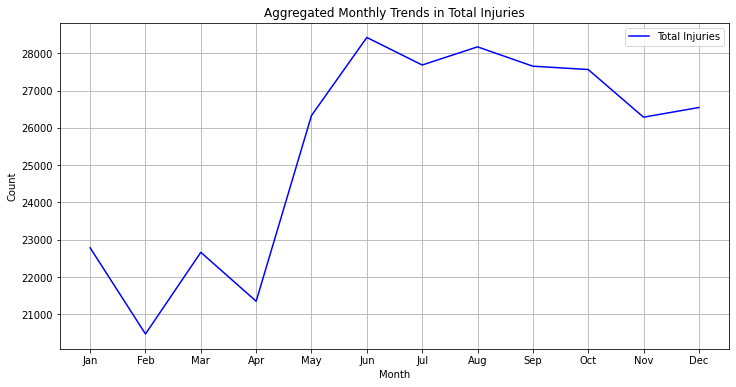

In [30]:
# Plot the aggregated data for Total Injuries
plt.figure(figsize=(12, 6))
plt.plot(monthly_agg_data['Month'], monthly_agg_data['TOTAL_INJURED'], label='Total Injuries', color='blue')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Aggregated Monthly Trends in Total Injuries')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

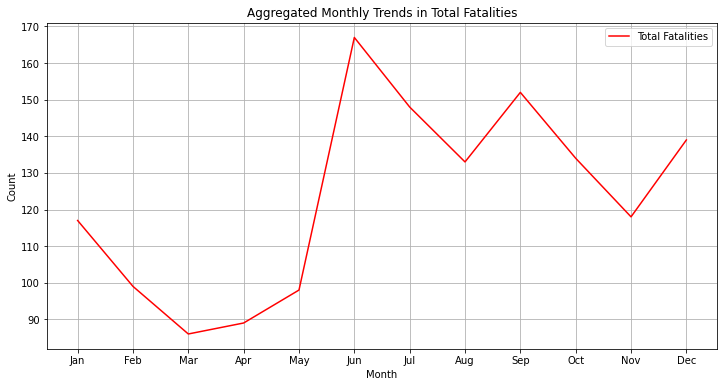

In [31]:
# Plot the aggregated data for Total Fatalities
plt.figure(figsize=(12, 6))
plt.plot(monthly_agg_data['Month'], monthly_agg_data['TOTAL_KILLED'], label='Total Fatalities', color='red')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Aggregated Monthly Trends in Total Fatalities')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()